<center><h5> Data Science For Suppy Chain & Operations </h5></center>
<center><h3> Etude de cas d'évaluation </h3></center>
<center><h1> Clustering de magasins </h1></center>

*Remplir ici votre compréhension du contexte et des objectifs*

# I. Chargement et création du jeu de données

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#Ceci permet d'afficher 
pd.options.display.max_columns = 100
pd.options.display.max_rows  = 100

In [3]:
path = r'C:/Users/HP/Desktop/data science sc/cours 3/data.csv'


mag = pd.read_csv("C:/Users/HP/Desktop/data science sc/cours 4 projet groupe/Données - Use Case 2/magasins.csv", encoding = "latin", sep = ";", decimal = ',') #Le paramètre decimal définit comment est représenter la virgule des chiffres décimaux
ref = pd.read_csv("C:/Users/HP/Desktop/data science sc/cours 4 projet groupe/Données - Use Case 2/references_ete.csv", encoding = "latin", sep = ";")
ventes = pd.read_csv("C:/Users/HP/Desktop/data science sc/cours 4 projet groupe/Données - Use Case 2/ventes.csv", encoding = "latin", sep = ";")

## I.1. Exploration, nettoyage et préparation des données

Nous allons procéder à l'exploration des différents fichiers fournis et au nettoyage de chacun des fichiers

### I.1.1. Exploration des fichiers 

#### Fichier magasin

*Insérez vos conclusions ici*

In [278]:
mag.head()

,Magasin,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_99,GM,55.0,FROID,OUI,CLIENT FULL PRICE,267.438950,1.297333
1,Magasin_49,GM,22.0,CHAUD,OUI,CLIENT FULL PRICE,207.102617,1.132231
2,Magasin_39,GM,75.0,TEMPERE,OUI,CLIENT DISCOUNT,195.375729,1.198321
3,Magasin_193,BOUTIQUE,139.0,TEMPERE,NON,CLIENT FULL PRICE,320.788863,1.780049
4,Magasin_190,GM,35.0,TEMPERE,OUI,CLIENT DISCOUNT,171.843728,1.268786


In [6]:
ref.head()

,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment
0,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_0,LICHEN,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
1,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_1,SABLE,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
2,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_2,NOIR,150,SUMMER,SLOW,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
3,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_3,BLEU,165,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL
4,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,VISCOSE,Référence_4,BUBBLE GUM,170,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL


In [7]:
ventes.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23
1,Magasin_198,Référence_133,BLOSSOM,Référence_133BLOSSOM,Référence_133BLOSSOMMagasin_198,E18 - ETE 2018,PULL,PAP FEMME,COTON,SAISONNIER,4
2,Magasin_10,Référence_279,MARINE,Référence_279MARINE,Référence_279MARINEMagasin_10,E18 - ETE 2018,VESTE,PAP FEMME,POLYESTER,SAISONNIER,3
3,Magasin_65,Référence_87,KAKI,Référence_87KAKI,Référence_87KAKIMagasin_65,E18 - ETE 2018,JUPE,PAP FEMME,LIN / COTON,SAISONNIER,1
4,Magasin_100,Référence_28,FICELLE,Référence_28FICELLE,Référence_28FICELLEMagasin_100,E18 - ETE 2018,CARDIGAN,PAP FEMME,CASHMERE,SAISONNIER,2


In [8]:
ventes['Magasin'].nunique()

168

In [9]:
mag.isnull().sum()

Réseau                              0
Pays magasin                        0
Magasin                             0
Code magasin                        0
Type boutique                       0
Surface magasin (*)                 0
Climat                              0
Environnement concurrentiel        49
Traffic                            47
Clientèle                          47
Saisonnalité                       47
Géographie                         47
Mall                               94
Comportement d'achat                0
Panier moyen  HT (Taux budget)     2
Indice de vente                     2
dtype: int64

In [10]:
ref.isnull().sum()

Libellé rayon                       0
Libellé thème                       0
Libellé famille                     0
Libellé sous famille               24
Produit                             0
Libellé couleurs                    0
PVB                                 0
SPRING / SUMMER                    22
Puissance produit                   1
Champs UVS Statut de collection     0
Prix (selon famille)                0
Iconique                            0
Type saison                         0
Segment                             0
dtype: int64

In [11]:
ventes.isnull().sum()

Magasin                        0
Référence produit              0
Couleur produit                0
Modèle_Coloris                 0
SKUSTORE                       0
Collection produit             0
Classification famille         0
Classification rayon           0
Classification sous famille    0
Statut Collection Produit      0
Ventes17_19                    0
dtype: int64

Quel est le nombre de magasins présent dans le fichier ? De quelles données disposons-nous ?

...

Quelques analyses à titre d'exemple...
- La variable Réseau peut être supprimée
- Nous pouvons uniquement garder le champ "Magasin" comme ID pour faire des jointures avec les autres tables, le champ code magasin peut être supprimé
- Il y a des données manquantes sur certains champs : 
    - Dans la colonne Mall, les valeurs manquantes signifient que les magasins ne sont pas dans des Malls
    - Dans d'autres colonnes catégoriques (Environnement concurrentiel, Traffic, Géographie, etc.) certains champs sont manquants. Il parait que l'information n'a pas été renseignée. Deux options s'offrent à nous : 
        - Supprimer ces colonnes 
        - Les compléter avec la valeur la plus présente
        - ...

        

In [ ]:
# Explorer le dataset

In [39]:
mag['Magasin'].nunique()

207

Afficher le nombre unique de "Magasin"


In [54]:
categorical_variables = ['Réseau', 'Pays magasin','Type boutique',
       'Climat', 'Environnement concurrentiel','Traffic', 'Clientèle', 'Saisonnalité', 
        'Géographie', 'Mall', 'Comportement d\'achat']

In [ ]:
numerical_variables = ['Surface magasin (*)', "Panier moyen \x80 HT (Taux budget)", "Indice de vente"]

Afficher un comptage différentes modalités des variables catégoriques. Qu'en déduisez-vous ?

In [ ]:
for cat in categorical_variables: 
    print("Variable : {}".format(cat))
    #print(remplir ici)
    print()

Afficher quelques statistiques sur les variables numériques

In [ ]:
for num in numerical_variables : 
    print("Variable : {}".format(num))
    #print(remplir ici)
    print()

Données manquantes : 

Afficher les données manquantes pour chaque variable.
Quelles données peut-on compléter ? Quels choix faites vous en terme de gestion des données manquantes et pourquoi ?

In [ ]:
#Afficher les données manquantes ici

In [41]:
mag.isnull().sum()

Réseau                              0
Pays magasin                        0
Magasin                             0
Code magasin                        0
Type boutique                       0
Surface magasin (*)                 0
Climat                              0
Environnement concurrentiel        49
Traffic                            47
Clientèle                          47
Saisonnalité                       47
Géographie                         47
Mall                               94
Comportement d'achat                0
Panier moyen  HT (Taux budget)     2
Indice de vente                     2
dtype: int64

In [49]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


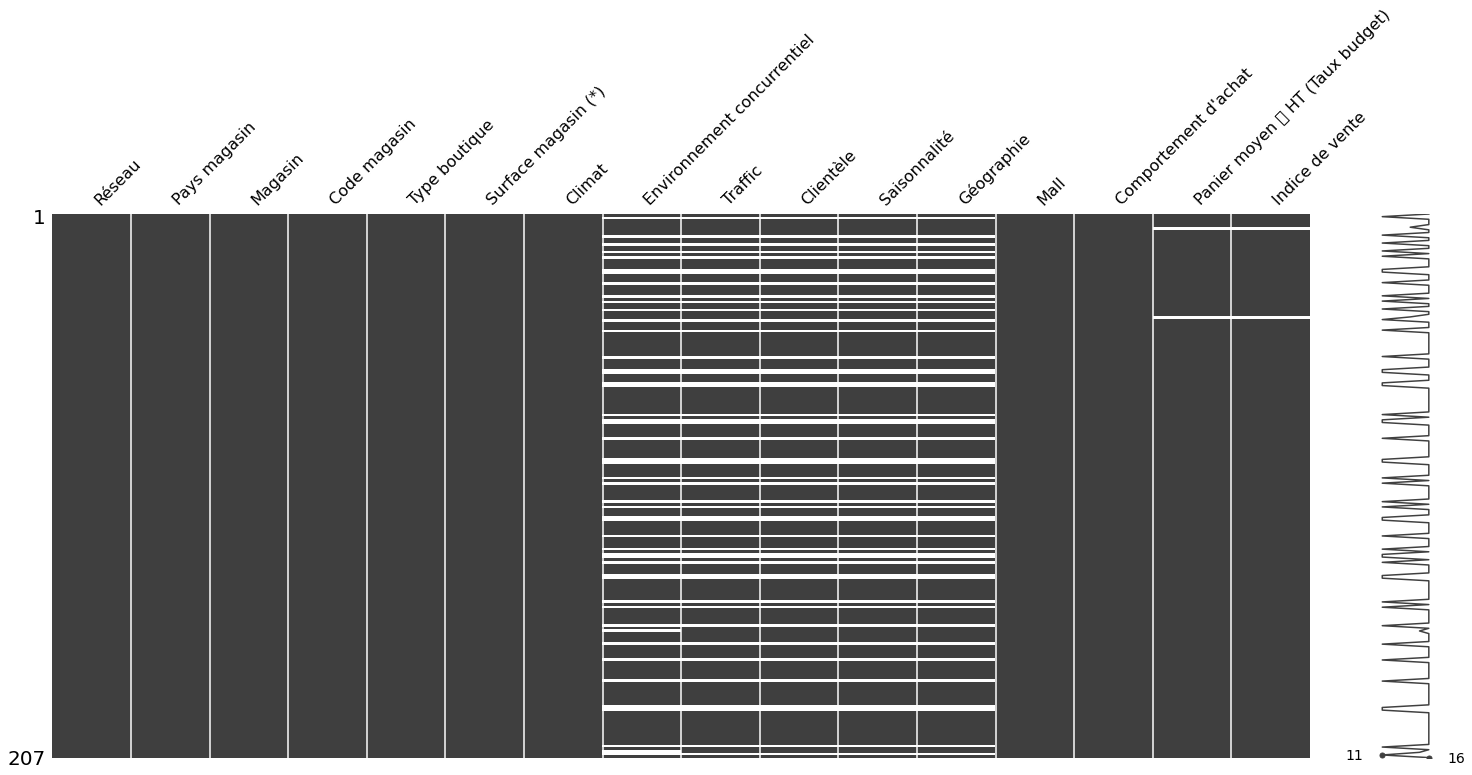

In [50]:
import missingno as msno
msno.matrix(mag)

In [12]:
#remplacer les valeurs manquantes avec non 
mag["Mall"] = mag["Mall"].fillna("NON")

Pour des raisons de simplicité, nous enlevons les variables contenant plus de 20 % de données manquantes. Vous êtes bien entendu libres de tester différentes imputations de données, comme imputer avec la valeur la plus présente par exemple.

Nous pouvons également certaines colonnes jugées inutiles (Réseau, Code Magasin). La colonne Pays Magasin peut être retravaillée si vous le souhaitez. Nous l'enlevons ici.

In [13]:
mag = mag.drop(["Réseau", "Pays magasin", "Code magasin", 
                'Environnement concurrentiel', 'Traffic', 'Clientèle', 'Saisonnalité',
       'Géographie'], axis = 1)

#### Fichier ventes

*Insérer vos conclusions ici.*

Combien y'a-t-il de magasins dans ce fichier, combien de y'a-t-il de produits ? Comparer le nombre de magasins ici avec le fichier magasins.

In [ ]:
# Explorer le dataset

In [70]:
categorical_values_ventes = ["Collection produit", 'Classification famille',
       'Classification rayon', 'Classification sous famille',
       'Statut Collection Produit']
numerical_values_ventes = ['Ventes_17_19']

In [77]:
ventes

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23
1,Magasin_198,Référence_133,BLOSSOM,Référence_133BLOSSOM,Référence_133BLOSSOMMagasin_198,E18 - ETE 2018,PULL,PAP FEMME,COTON,SAISONNIER,4
2,Magasin_10,Référence_279,MARINE,Référence_279MARINE,Référence_279MARINEMagasin_10,E18 - ETE 2018,VESTE,PAP FEMME,POLYESTER,SAISONNIER,3
3,Magasin_65,Référence_87,KAKI,Référence_87KAKI,Référence_87KAKIMagasin_65,E18 - ETE 2018,JUPE,PAP FEMME,LIN / COTON,SAISONNIER,1
4,Magasin_100,Référence_28,FICELLE,Référence_28FICELLE,Référence_28FICELLEMagasin_100,E18 - ETE 2018,CARDIGAN,PAP FEMME,CASHMERE,SAISONNIER,2
...,...,...,...,...,...,...,...,...,...,...,...
36721,Magasin_86,Référence_41,LICHEN,Référence_41LICHEN,Référence_41LICHENMagasin_86,E18 - ETE 2018,CHEMISE,PAP FEMME,COTON,SAISONNIER,8
36722,Magasin_79,Référence_257,NOIR,Référence_257NOIR,Référence_257NOIRMagasin_79,E18 - ETE 2018,TUNISIEN,PAP FEMME,COTON,PERMANENT,4
36723,Magasin_102,Référence_147,MARINE,Référence_147MARINE,Référence_147MARINEMagasin_102,E18 - ETE 2018,PULL,PAP FEMME,LAINE / CASH,SAISONNIER,1
36724,Magasin_153,Référence_255,JAPON,Référence_255JAPON,Référence_255JAPONMagasin_153,E18 - ETE 2018,TUNIQUE ML,PAP FEMME,POLYESTER,SAISONNIER,4


Afficher un comptage différentes modalités des variables catégoriques. Qu'en déduisez-vous ?

In [ ]:
for cat in categorical_values_ventes :
    print("Variable : {}".format(cat))
    #print(put here)
    print()

#### Fichier de références

*Insérez vos conclusions ici.*

In [19]:
ventes.shape

(36726, 11)

- Le fichier de références contient des informations sur 288 produits, et 357 lignes contenant avec le détail du coloris.
- Il convient de faire une jointure entre le fichier des références et des ventes. Pour ceci, il faut créer la clé de jointure :
    - Pour la table ventes, il s'agit du champ Modèle_Coloris, qui est une concaténation des champs "Référence produit" et "Couleur produit"
    - Pour la table références, il faut créer la clé de jointure en concaténant le champ "Produit" et le champ "Libellé couleurs"

In [ ]:
# Exploration de jeu de données

In [ ]:
# Exploration des variables catégoriques et numériques

In [20]:
#Création  de la clé de jointure
ref["Modèle_Coloris"] = ref["Produit"] + ref["Libellé couleurs"]

In [21]:
ref

,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment,Modèle_Coloris
0,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_0,LICHEN,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL,Référence_0LICHEN
1,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_1,SABLE,150,SUMMER,BEST,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL,Référence_1SABLE
2,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_2,NOIR,150,SUMMER,SLOW,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL,Référence_2NOIR
3,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,COTON,Référence_3,BLEU,165,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL,Référence_3BLEU
4,PAP FEMME,CHAINETRAME,BERMUDAS - SHORT,VISCOSE,Référence_4,BUBBLE GUM,170,SUMMER,MEDIUM,SAISONNIER,MEDIUM,NON,SUMMER,CASUAL,Référence_4BUBBLE GUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,PAP FEMME,CHAINETRAME,VESTE,VISCOSE,Référence_283,NOIR,455,SPRING,BEST,SAISONNIER,MEDIUM,NON,MID-SEASON,DAYWEAR,Référence_283NOIR
353,PAP FEMME,CHAINETRAME,VESTE,VISCOSE,Référence_284,LAVANDE,455,SUMMER,SLOW,SAISONNIER,MEDIUM,NON,MID-SEASON,FASHION,Référence_284LAVANDE
354,PAP FEMME,CHAINETRAME,VESTE,LAINE,Référence_285,JUDO,495,SPRING,BEST,SAISONNIER,MEDIUM,NON,SUMMER,DAYWEAR,Référence_285JUDO
355,PAP FEMME,CHAINETRAME,VESTE,ACETATE,Référence_286,KLEIN,495,SPRING,MEDIUM,SAISONNIER,MEDIUM,OUI,MID-SEASON,FASHION,Référence_286KLEIN


### I.1.2. Jointure entre le fichier de ventes et de références

Nous effectuons une jointure "inner" entre les ventes et les références. L'objectif est de ne garder que les informations contenues dans les deux fichiers.

Nous calculons ensuite le montant total pour chaque référence produit et chaque magasin.

In [22]:
ventes_ref = ventes.merge(ref, how = 'inner', on = "Modèle_Coloris")

In [24]:
ventes_ref.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL
1,Magasin_193,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_193,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,4,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL
2,Magasin_154,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_154,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,16,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL
3,Magasin_81,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_81,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,8,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL
4,Magasin_84,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_84,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,7,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL


In [27]:
# éliminer les colonnes qqui vont pas nous aider à traiter notre problématique 

ventes_ref.drop(["Référence produit", "Couleur produit", "SKUSTORE","Produit", "Libellé couleurs"], axis = 1)

In [28]:
# Calculer le Montant Total
ventes_ref["Montant total"] = ventes_ref["Ventes17_19"] * ventes_ref["PVB"]

In [282]:
ventes_ref.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment,Montant total,Iconique_transformed
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,8740,Iconique
1,Magasin_193,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_193,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,4,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,1520,Iconique
2,Magasin_154,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_154,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,16,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,6080,Iconique
3,Magasin_81,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_81,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,8,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,3040,Iconique
4,Magasin_84,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_84,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,7,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,2660,Iconique


### I.1.3. Création de variables à la maille du magasin sur le fichier joint des ventes et des références

Etant donné que nous souhaitons faire un clustering de magasins, il convient de calculer de nouvelles features à partir du dataset "ventes_ref" à la maille du magasin.
La fonctionnalité groupby permet de répondre à ce besoin.


**Calcul du montant total et du nombre de ventes total par magasin**

In [30]:
mag_montants_ventes = ventes_ref.groupby("Magasin")[["Montant total", "Ventes17_19"]].sum()

In [31]:
mag_montants_ventes

,Montant total,Ventes17_19
Magasin,,
Magasin_1,512234,2283
Magasin_10,181469,856
Magasin_100,593470,2546
Magasin_101,458868,2169
Magasin_102,163359,793
...,...,...
Magasin_92,373562,1830
Magasin_94,362261,1710
Magasin_97,350123,1607


Calculez le prix de vente moyen

In [32]:
#on fait la division
mag_montants_ventes["Prix de vente moyen"] = mag_montants_ventes["Montant total"]/mag_montants_ventes["Ventes17_19"]


In [33]:
mag_montants_ventes

,Montant total,Ventes17_19,Prix de vente moyen
Magasin,,,
Magasin_1,512234,2283,224.368813
Magasin_10,181469,856,211.996495
Magasin_100,593470,2546,233.098979
Magasin_101,458868,2169,211.557400
Magasin_102,163359,793,206.001261
...,...,...,...
Magasin_92,373562,1830,204.132240
Magasin_94,362261,1710,211.848538
Magasin_97,350123,1607,217.873678


**Calcul du pourcentage de ventes des produits iconiques par magasin** 

In [34]:
ventes_ref["Iconique"].value_counts(dropna = False)

NON    22363
OUI    14268
Name: Iconique, dtype: int64

In [ ]:
#On remplace les champs Oui et Non par "Iconique" et "Non_iconique" pour pouvoir les reconnaitre plus tard

In [35]:
ventes_ref["Iconique_transformed"] = ventes_ref["Iconique"].map({"OUI":"Iconique", "NON": "Non_iconique"})

In [36]:
ventes_ref.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment,Montant total,Iconique_transformed
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,8740,Iconique
1,Magasin_193,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_193,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,4,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,1520,Iconique
2,Magasin_154,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_154,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,16,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,6080,Iconique
3,Magasin_81,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_81,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,8,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,3040,Iconique
4,Magasin_84,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_84,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,7,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,2660,Iconique


In [37]:
iconique_sum = ventes_ref.groupby(["Magasin", "Iconique_transformed"])['Ventes17_19'].sum().unstack()

In [38]:
iconique_sum.head()

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_1,931.0,1352.0
Magasin_10,339.0,517.0
Magasin_100,1009.0,1537.0
Magasin_101,877.0,1292.0
Magasin_102,345.0,448.0


Nous remarquons certaines valeurs manquantes. Cela veut dire que dans certains magasins (en l'occurence, les magasins 146 et 89), aucun produit iconique n'a été vendu. Nous allons donc imputer les valeurs manquantes à 0.

In [39]:
iconique_sum[iconique_sum.Iconique.isnull()]

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_118,NaN,1.0
Magasin_61,NaN,1.0


In [40]:
iconique_sum = iconique_sum.fillna(0)

In [42]:
iconique_prc = iconique_sum.div(iconique_sum.sum(axis = 1), axis = 0)

In [101]:
iconique_prc.head()

Iconique_transformed,Iconique,Non_iconique
Magasin,,
Magasin_1,0.407797,0.592203
Magasin_10,0.396028,0.603972
Magasin_100,0.396308,0.603692
Magasin_101,0.404334,0.595666
Magasin_102,0.435057,0.564943


In [ ]:
mag_montants_ventes = ventes_ref.groupby("Magasin")[["Montant total", "Ventes17_19"]].sum()

In [158]:
ventes_ref1 = ventes_ref.copy()

In [159]:
ventes_ref1 = ventes_ref1.merge(mag, how = 'inner', on = "Magasin")

In [51]:
#calculer le prix du panier moyen pour chauqe magasin et ausssi le nombre de d'article moyen 
mag_pan_indice = mag.groupby("Magasin")[["Panier moyen  HT (Taux budget)", "Indice de vente"]].mean()

In [52]:
mag_pan_indice 

,Panier moyen  HT (Taux budget),Indice de vente
Magasin,,
Magasin_1,396.439363,0.000000
Magasin_10,266.656273,1.479903
Magasin_100,325.514678,1.384380
Magasin_101,239.881670,1.371019
Magasin_102,277.290152,1.555035
...,...,...
Magasin_95,513.703718,1.858543
Magasin_96,187.582090,1.088215
Magasin_97,359.004113,1.623188


In [53]:
mag_montants_ventes

,Montant total,Ventes17_19,Prix de vente moyen
Magasin,,,
Magasin_1,512234,2283,224.368813
Magasin_10,181469,856,211.996495
Magasin_100,593470,2546,233.098979
Magasin_101,458868,2169,211.557400
Magasin_102,163359,793,206.001261
...,...,...,...
Magasin_92,373562,1830,204.132240
Magasin_94,362261,1710,211.848538
Magasin_97,350123,1607,217.873678


In [162]:
ventes_ref1.head()

,Magasin,Référence produit,Couleur produit,Modèle_Coloris,SKUSTORE,Collection produit,Classification famille,Classification rayon,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé rayon,Libellé thème,Libellé famille,Libellé sous famille,Produit,Libellé couleurs,PVB,SPRING / SUMMER,Puissance produit,Champs UVS Statut de collection,Prix (selon famille),Iconique,Type saison,Segment,Montant total,Iconique_transformed,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_127,Référence_14,BRUT,Référence_14BRUT,Référence_14BRUTMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,COTON,SAISONNIER,23,PAP FEMME,CHAINETRAME,BLOUSONS,COTON,Référence_14,BRUT,380,SPRING,MEDIUM,SAISONNIER,HIGH,OUI,MID-SEASON,CASUAL,8740,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
1,Magasin_127,Référence_133,BLOSSOM,Référence_133BLOSSOM,Référence_133BLOSSOMMagasin_127,E18 - ETE 2018,PULL,PAP FEMME,COTON,SAISONNIER,8,PAP FEMME,MAILLE,PULL,COTON,Référence_133,BLOSSOM,250,SUMMER,BEST,SAISONNIER,MEDIUM,NON,MID-SEASON,CASUAL,2000,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
2,Magasin_127,Référence_279,MARINE,Référence_279MARINE,Référence_279MARINEMagasin_127,E18 - ETE 2018,VESTE,PAP FEMME,POLYESTER,SAISONNIER,23,PAP FEMME,CHAINETRAME,VESTE,POLYESTER,Référence_279,MARINE,425,SPRING,BEST,SAISONNIER,MEDIUM,OUI,MID-SEASON,DAYWEAR,9775,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
3,Magasin_127,Référence_28,FICELLE,Référence_28FICELLE,Référence_28FICELLEMagasin_127,E18 - ETE 2018,CARDIGAN,PAP FEMME,CASHMERE,SAISONNIER,11,PAP FEMME,MAILLE,CARDIGAN,CASHMERE,Référence_28,FICELLE,340,SPRING,MEDIUM,SAISONNIER,MEDIUM,NON,MID-SEASON,DAYWEAR,3740,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
4,Magasin_127,Référence_18,NOIR,Référence_18NOIR,Référence_18NOIRMagasin_127,E18 - ETE 2018,BLOUSONS,PAP FEMME,LAINE,SAISONNIER,6,PAP FEMME,CHAINETRAME,BLOUSONS,LAINE,Référence_18,NOIR,630,SPRING,MEDIUM,SAISONNIER,HIGH,NON,MID-SEASON,DAYWEAR,3780,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486


In [163]:
ventes_ref1 = ventes_ref1.drop(["Collection produit","Classification famille","Classification sous famille","Référence produit","Libellé rayon","Modèle_Coloris","Couleur produit","SKUSTORE","Classification rayon" ,"Collection produit","Libellé famille","Libellé sous famille","Type saison","Produit","Libellé couleurs","Champs UVS Statut de collection","Iconique"], axis = 1)

In [164]:
ventes_ref1.head()

,Magasin,Classification famille,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé thème,PVB,SPRING / SUMMER,Puissance produit,Prix (selon famille),Type saison,Segment,Montant total,Iconique_transformed,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_127,BLOUSONS,COTON,SAISONNIER,23,CHAINETRAME,380,SPRING,MEDIUM,HIGH,MID-SEASON,CASUAL,8740,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
1,Magasin_127,PULL,COTON,SAISONNIER,8,MAILLE,250,SUMMER,BEST,MEDIUM,MID-SEASON,CASUAL,2000,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
2,Magasin_127,VESTE,POLYESTER,SAISONNIER,23,CHAINETRAME,425,SPRING,BEST,MEDIUM,MID-SEASON,DAYWEAR,9775,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
3,Magasin_127,CARDIGAN,CASHMERE,SAISONNIER,11,MAILLE,340,SPRING,MEDIUM,MEDIUM,MID-SEASON,DAYWEAR,3740,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
4,Magasin_127,BLOUSONS,LAINE,SAISONNIER,6,CHAINETRAME,630,SPRING,MEDIUM,HIGH,MID-SEASON,DAYWEAR,3780,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486


In [287]:
#ventes_ref1["Puissance produit"].unique()

In [172]:
ventes_ref1.head()

,Magasin,Statut Collection Produit,Ventes17_19,Libellé thème,PVB,SPRING / SUMMER,Puissance produit,Prix (selon famille),Segment,Montant total,Iconique_transformed,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_127,SAISONNIER,23,CHAINETRAME,380,SPRING,MEDIUM,HIGH,CASUAL,8740,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
1,Magasin_127,SAISONNIER,8,MAILLE,250,SUMMER,BEST,MEDIUM,CASUAL,2000,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
2,Magasin_127,SAISONNIER,23,CHAINETRAME,425,SPRING,BEST,MEDIUM,DAYWEAR,9775,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
3,Magasin_127,SAISONNIER,11,MAILLE,340,SPRING,MEDIUM,MEDIUM,DAYWEAR,3740,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
4,Magasin_127,SAISONNIER,6,CHAINETRAME,630,SPRING,MEDIUM,HIGH,DAYWEAR,3780,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486


In [173]:
ventes_ref2 = ventes_ref1.copy()

In [167]:
ventes_ref1.head()

,Magasin,Classification famille,Classification sous famille,Statut Collection Produit,Ventes17_19,Libellé thème,PVB,SPRING / SUMMER,Puissance produit,Prix (selon famille),Type saison,Segment,Montant total,Iconique_transformed,Type boutique,Surface magasin (*),Climat,Mall,Comportement d'achat,Panier moyen  HT (Taux budget),Indice de vente
0,Magasin_127,BLOUSONS,COTON,SAISONNIER,23,CHAINETRAME,380,SPRING,MEDIUM,HIGH,MID-SEASON,CASUAL,8740,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
1,Magasin_127,PULL,COTON,SAISONNIER,8,MAILLE,250,SUMMER,BEST,MEDIUM,MID-SEASON,CASUAL,2000,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
2,Magasin_127,VESTE,POLYESTER,SAISONNIER,23,CHAINETRAME,425,SPRING,BEST,MEDIUM,MID-SEASON,DAYWEAR,9775,Iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
3,Magasin_127,CARDIGAN,CASHMERE,SAISONNIER,11,MAILLE,340,SPRING,MEDIUM,MEDIUM,MID-SEASON,DAYWEAR,3740,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486
4,Magasin_127,BLOUSONS,LAINE,SAISONNIER,6,CHAINETRAME,630,SPRING,MEDIUM,HIGH,MID-SEASON,DAYWEAR,3780,Non_iconique,GM,127.0,TEMPERE,OUI,CLIENT DISCOUNT,275.900829,1.430486


**Faire le même traitement pour d'autres colonnes (nous proposon ces colonnes, mais il est possible d'en rajouter d'autres si vous les trouvez pertinentes) :**
- Prix (selon famille)
- Type saison
- Segment
- Libellé thème
- Statut de collection

Il peut être pertinent de créer une boucle for et de stocker les datasets temporaires dans une liste, puis de les concaténer

In [177]:
#On rajoute le nom de la feature pour reconnaitre les catégories
ventes_ref1["Prix (selon famille)_transformed"] = "Famille prix_"+ventes_ref1["Prix (selon famille)"]

#Même chose pour le Segment
ventes_ref1["Segment_transformed"] = "Segment_"+ventes_ref1["Segment"]

#Même chose pour le Libellé thème
ventes_ref1["Libellé thème_transformed"] = "Libellé thème_"+ventes_ref1["Libellé thème"]

#Même chose pour le Libellé statut collection
ventes_ref1["Statut Collection Produit_transformed"] = "Statut Collection Produit_"+ventes_ref1["Statut Collection Produit"]

#Même chose pour le Libellé Type Boutique
ventes_ref1["Type boutique_transformed"] = "Type boutique_"+ventes_ref1["Type boutique"]

#Même chose pour le Libellé Climat
ventes_ref1["Climat_transformed"] = "Climat_"+ventes_ref1["Climat"]

#Même chose pour le Libellé Mall
ventes_ref1["Mall_transformed"] = "Mall_"+ventes_ref1["Mall"]

#Même chose pour le Libellé Puissance produit
ventes_ref1["Puissance produit_transformed"] = "Puissance produit_"+ventes_ref1["Puissance produit"]

#Même chose pour le Libellé Classification sous famille
ventes_ref1["Comportement d'achat_tranformed"] = "Comportement d'achat_"+ventes_ref1["Comportement d'achat"]

In [192]:
ventes_ref1 = ventes_ref1.drop(["Comportement d'achat", "SPRING / SUMMER", "Statut Collection Produit","Libellé thème","Puissance produit","Prix (selon famille)","Segment","Type boutique","Climat","Mall"], axis = 1)


In [197]:
ventes_ref1.head()

,Magasin,Ventes17_19,PVB,Montant total,Iconique_transformed,Surface magasin (*),Panier moyen  HT (Taux budget),Indice de vente,Prix (selon famille)_transformed,Segment_transformed,Libellé thème_transformed,Statut Collection Produit_transformed,Type boutique_transformed,Climat_transformed,Mall_transformed,Puissance produit_transformed,Comportement d'achat_tranformed
0,Magasin_127,23,380,8740,Iconique,127.0,275.900829,1.430486,Famille prix_HIGH,Segment_CASUAL,Libellé thème_CHAINETRAME,Statut Collection Produit_SAISONNIER,Type boutique_GM,Climat_TEMPERE,Mall_OUI,Puissance produit_MEDIUM,Comportement d'achat_CLIENT DISCOUNT
1,Magasin_127,8,250,2000,Non_iconique,127.0,275.900829,1.430486,Famille prix_MEDIUM,Segment_CASUAL,Libellé thème_MAILLE,Statut Collection Produit_SAISONNIER,Type boutique_GM,Climat_TEMPERE,Mall_OUI,Puissance produit_BEST,Comportement d'achat_CLIENT DISCOUNT
2,Magasin_127,23,425,9775,Iconique,127.0,275.900829,1.430486,Famille prix_MEDIUM,Segment_DAYWEAR,Libellé thème_CHAINETRAME,Statut Collection Produit_SAISONNIER,Type boutique_GM,Climat_TEMPERE,Mall_OUI,Puissance produit_BEST,Comportement d'achat_CLIENT DISCOUNT
3,Magasin_127,11,340,3740,Non_iconique,127.0,275.900829,1.430486,Famille prix_MEDIUM,Segment_DAYWEAR,Libellé thème_MAILLE,Statut Collection Produit_SAISONNIER,Type boutique_GM,Climat_TEMPERE,Mall_OUI,Puissance produit_MEDIUM,Comportement d'achat_CLIENT DISCOUNT
4,Magasin_127,6,630,3780,Non_iconique,127.0,275.900829,1.430486,Famille prix_HIGH,Segment_DAYWEAR,Libellé thème_CHAINETRAME,Statut Collection Produit_SAISONNIER,Type boutique_GM,Climat_TEMPERE,Mall_OUI,Puissance produit_MEDIUM,Comportement d'achat_CLIENT DISCOUNT


In [201]:
categorical_features = ["Iconique_transformed","Comportement d'achat_tranformed", "Statut Collection Produit_transformed","Libellé thème_transformed","Puissance produit_transformed","Prix (selon famille)_transformed","Segment_transformed","Type boutique_transformed","Climat_transformed","Mall_transformed"]

In [194]:
ventes_ref1.isna().sum()

Magasin                                  0
Ventes17_19                              0
PVB                                      0
Montant total                            0
Iconique_transformed                     0
Surface magasin (*)                      0
Panier moyen  HT (Taux budget)          0
Indice de vente                          0
Prix (selon famille)_transformed         0
Segment_transformed                      0
Libellé thème_transformed                0
Statut Collection Produit_transformed    0
Type boutique_transformed                0
Climat_transformed                       0
Mall_transformed                         0
Puissance produit_transformed            0
Comportement d'achat_tranformed          0
dtype: int64

In [202]:
ventes_ref1 = pd.get_dummies(ventes_ref1, columns = categorical_features, drop_first=True)

In [288]:
ventes_ref1

,Magasin,Ventes17_19,PVB,Montant total,Surface magasin (*),Panier moyen  HT (Taux budget),Indice de vente,Iconique_transformed_Non_iconique,Comportement d'achat_tranformed_Comportement d'achat_CLIENT FULL PRICE,Statut Collection Produit_transformed_Statut Collection Produit_PERMANENT,Statut Collection Produit_transformed_Statut Collection Produit_SAISONNIER,Libellé thème_transformed_Libellé thème_JERSEY,Libellé thème_transformed_Libellé thème_MAILLE,Puissance produit_transformed_Puissance produit_MEDIUM,Puissance produit_transformed_Puissance produit_PERMANENT,Puissance produit_transformed_Puissance produit_REPROD OPGM,Puissance produit_transformed_Puissance produit_SLOW,Puissance produit_transformed_Puissance produit_Spécifique,Prix (selon famille)_transformed_Famille prix_LOW,Prix (selon famille)_transformed_Famille prix_MEDIUM,Segment_transformed_Segment_DAYWEAR,Segment_transformed_Segment_FASHION,Type boutique_transformed_Type boutique_GM,Climat_transformed_Climat_FROID,Climat_transformed_Climat_TEMPERE,Mall_transformed_Mall_OUI
0,Magasin_127,23,380,8740,127.0,275.900829,1.430486,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
1,Magasin_127,8,250,2000,127.0,275.900829,1.430486,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
2,Magasin_127,23,425,9775,127.0,275.900829,1.430486,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1
3,Magasin_127,11,340,3740,127.0,275.900829,1.430486,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1
4,Magasin_127,6,630,3780,127.0,275.900829,1.430486,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36626,Magasin_61,1,105,105,27.0,246.164279,1.170045,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1
36627,Magasin_50,1,85,85,17.0,204.134887,1.056634,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
36628,Magasin_27,2,120,240,0.0,270.272772,1.429703,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
36629,Magasin_22,1,280,280,0.0,198.214323,0.923529,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1


In [204]:
ventes_ref1.columns

Index(['Magasin', 'Ventes17_19', 'PVB', 'Montant total', 'Surface magasin (*)',
       'Panier moyen  HT (Taux budget)', 'Indice de vente',
       'Iconique_transformed_Non_iconique',
       'Comportement d'achat_tranformed_Comportement d'achat_CLIENT FULL PRICE',
       'Statut Collection Produit_transformed_Statut Collection Produit_PERMANENT',
       'Statut Collection Produit_transformed_Statut Collection Produit_SAISONNIER',
       'Libellé thème_transformed_Libellé thème_JERSEY',
       'Libellé thème_transformed_Libellé thème_MAILLE',
       'Puissance produit_transformed_Puissance produit_MEDIUM',
       'Puissance produit_transformed_Puissance produit_PERMANENT',
       'Puissance produit_transformed_Puissance produit_REPROD OPGM',
       'Puissance produit_transformed_Puissance produit_SLOW',
       'Puissance produit_transformed_Puissance produit_Spécifique',
       'Prix (selon famille)_transformed_Famille prix_LOW',
       'Prix (selon famille)_transformed_Famille prix_ME

In [ ]:
#Création de variables à la maille du magasin 

Mall_transformed_Mall_OUI
Libellé thème_transformed_Libellé thème_JERSEY
Libellé thème_transformed_Libellé thème_MAILLE

In [206]:
ventes_ref22 = ventes_ref1[["Magasin","Mall_transformed_Mall_OUI","Libellé thème_transformed_Libellé thème_JERSEY","Libellé thème_transformed_Libellé thème_MAILLE"]]
ventes_ref22

,Magasin,Mall_transformed_Mall_OUI,Libellé thème_transformed_Libellé thème_JERSEY,Libellé thème_transformed_Libellé thème_MAILLE
0,Magasin_127,1,0,0
1,Magasin_127,1,0,1
2,Magasin_127,1,0,0
3,Magasin_127,1,0,1
4,Magasin_127,1,0,0
...,...,...,...,...
36626,Magasin_61,1,1,0
36627,Magasin_50,1,1,0
36628,Magasin_27,1,1,0
36629,Magasin_22,1,0,0


In [208]:
mag_Mail = ventes_ref22.groupby("Magasin")[["Mall_transformed_Mall_OUI"]].mean()
mag_Lib1 = ventes_ref22.groupby("Magasin")[["Libellé thème_transformed_Libellé thème_JERSEY"]].mean()
mag_Lib2 = ventes_ref22.groupby("Magasin")[["Libellé thème_transformed_Libellé thème_MAILLE"]].mean()



In [228]:
mag_montants_ventes = mag_montants_ventes.merge(mag_pan_indice , how = 'inner', on = "Magasin")
mag_montants_ventes = mag_montants_ventes.merge(mag_Mail , how = 'inner', on = "Magasin")
mag_montants_ventes = mag_montants_ventes.merge(mag_Lib1 , how = 'inner', on = "Magasin")
mag_montants_ventes = mag_montants_ventes.merge(mag_Lib2 , how = 'inner', on = "Magasin")

In [269]:
mag_montants_ventes = mag_montants_ventes.reset_index()
mag_montants_ventes

,Magasin,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall_transformed_Mall_OUI,Libellé thème_transformed_Libellé thème_JERSEY,Libellé thème_transformed_Libellé thème_MAILLE
0,Magasin_1,512234,2283,224.368813,396.439363,0.000000,0,0.307927,0.201220
1,Magasin_10,181469,856,211.996495,266.656273,1.479903,0,0.328829,0.225225
2,Magasin_100,593470,2546,233.098979,325.514678,1.384380,1,0.314815,0.206790
3,Magasin_101,458868,2169,211.557400,239.881670,1.371019,0,0.338078,0.199288
4,Magasin_102,163359,793,206.001261,277.290152,1.555035,0,0.363636,0.203463
...,...,...,...,...,...,...,...,...,...
163,Magasin_92,373562,1830,204.132240,277.214166,1.507168,0,0.337963,0.189815
164,Magasin_94,362261,1710,211.848538,353.286731,1.904915,1,0.354962,0.209924
165,Magasin_97,350123,1607,217.873678,359.004113,1.623188,1,0.333333,0.209220
166,Magasin_98,81808,382,214.157068,276.948478,1.360963,1,0.404580,0.167939


**Nous vous encourageons à rajouter de nouvelles variables si elles vous paraissent pertinentes.**

### I.1.4. Concaténation avec le fichier des magasins

In [232]:
mags_final = mag_montants_ventes

In [ ]:
#mags_final = mag.merge(features_magasins, left_on = "Magasin", right_index = True )

In [270]:
# nous définissons la colonne Magasin comme étant l'index de chaque ligne
mags_final = mags_final.set_index('Magasin')

In [ ]:
mags_df = mags_final[cols_num].copy()

# II. Analyse en composantes principales

In [233]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np

Comme expliqué en cours, l'analyse en composantes principales (PCA) est une méthode factorielle de réduction de dimension pour l’exploration de données quantitatives. Elle permet de transformer des variables corrélées en nouvelles variables décorrélées, appelées composantes principales.

In [243]:
# Réaliser une PCA Ici (pensez à tester avec des données normalisées)

data = mags_final
data_pca = mags_final.copy()
data_pca = data_pca.reset_index()
data_pca = data_pca.drop("Magasin", axis=1)

## Normalisation
cols_scale = list(data_pca.columns)
scaler = StandardScaler()
data_pca[cols_scale] = scaler.fit_transform(data_pca[cols_scale])

## PCA
## Modifier le paramètres n_components en mettant un entier pour le nombre de PC, ou un float < 1 pour le % de la variance
n_pc = 0.9
pca = PCA(n_components = n_pc)
pca.fit(data_pca)
X_pca = pca.transform(data_pca)

In [240]:
# Explained variance ratio des composantes principales (qu'on pourrait comparer avec celles des features originales...)
explained_var = list(pca.explained_variance_)
explained_var_ratio = list(pca.explained_variance_ratio_)
for i in range(len(explained_var)):
    print("Variance of PC {} : {}, explained variance ratio : {} %".format(i, 
                                                                         np.round(explained_var[i],2), 
                                                                         np.round(100*explained_var_ratio[i],2)))

Variance of PC 0 : 3.17, explained variance ratio : 39.37 %
Variance of PC 1 : 1.64, explained variance ratio : 20.35 %
Variance of PC 2 : 1.1, explained variance ratio : 13.62 %
Variance of PC 3 : 1.04, explained variance ratio : 12.97 %
Variance of PC 4 : 0.63, explained variance ratio : 7.87 %


Représentez des magasins sur les composantes principales

In [241]:
df_components = pd.DataFrame(pca.components_).T
df_components["Original Feature"] = data_pca.columns
l = list(range(10))
new_l = ["PC-" + str(i) for i in l]
df_components = df_components.rename(columns=dict(zip(l, new_l)))
df_components

,PC-0,PC-1,PC-2,PC-3,PC-4,Original Feature
0,0.479253,-0.076663,0.457485,-0.155332,-0.135906,Montant total
1,0.472449,-0.080021,0.476749,-0.146800,-0.149153,Ventes17_19
2,0.180708,0.642371,-0.213358,-0.287434,0.054815,Prix de vente moyen
3,0.439966,-0.185954,-0.281240,-0.112963,0.414963,Panier moyen  HT (Taux budget)
4,0.409100,-0.218277,-0.389197,0.118454,0.391514,Indice de vente
5,-0.306489,0.095156,0.489986,-0.202608,0.780590,Mall_transformed_Mall_OUI
6,-0.206007,-0.681204,0.006079,-0.087606,-0.015099,Libellé thème_transformed_Libellé thème_JERSEY
7,0.130940,0.140577,0.217263,0.892293,0.145782,Libellé thème_transformed_Libellé thème_MAILLE


Analysez les composantes principales comme vu en cours : Quelles sont les variables les plus corrélées avec les composantes principales ? 

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


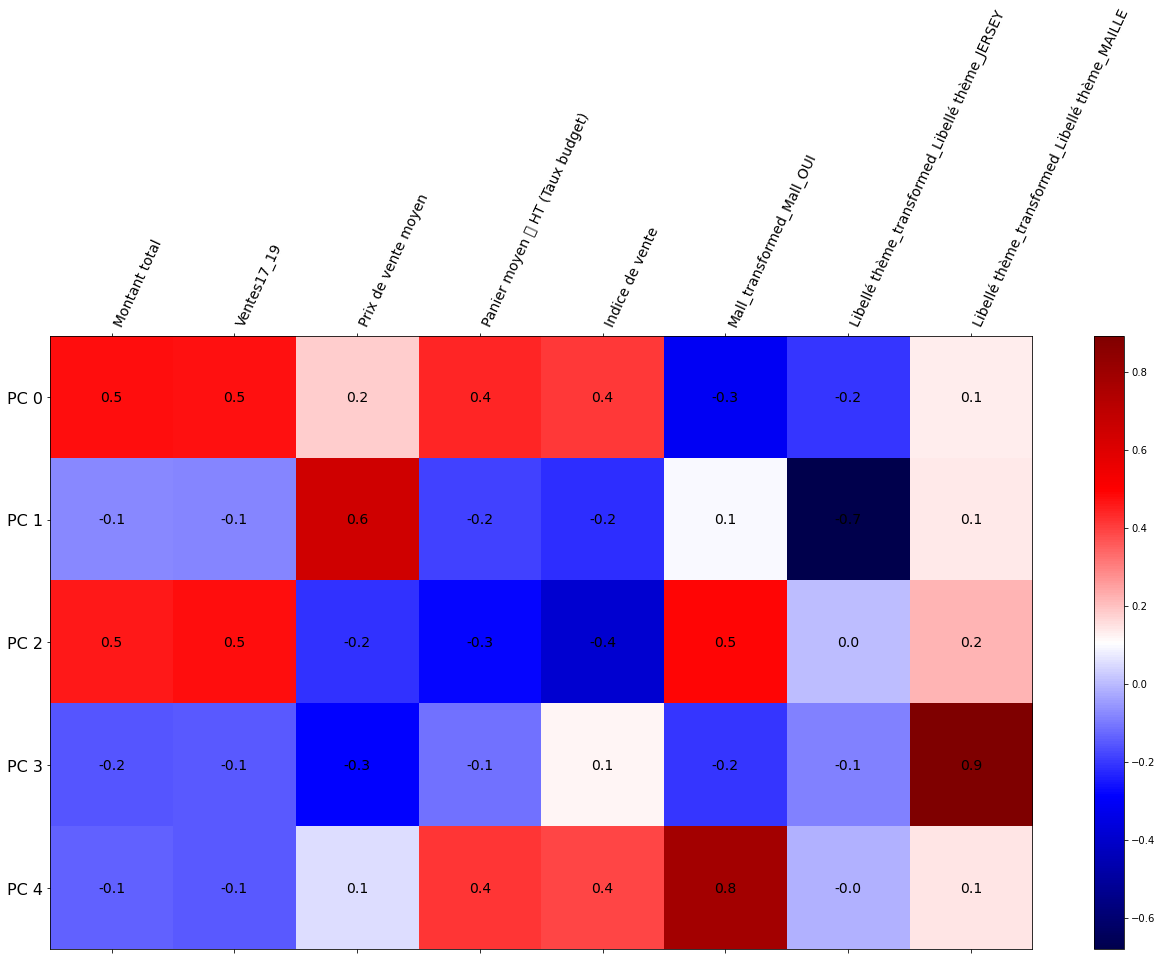

In [244]:
principalDf = pd.DataFrame(data = X_pca).rename(columns={i: "PC "+str(i) for i in range(X_pca.shape[1])})
finalDf = pd.concat([principalDf.reset_index(), data.reset_index()], axis = 1)

plt.figure(figsize=(22,11))
plt.matshow(pca.components_, cmap='seismic', fignum=1,)
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', fontsize=14)
plt.yticks(range(X_pca.shape[1]),["PC "+str(i) for i in range(X_pca.shape[1])],fontsize=16)
plt.colorbar()
plt.xticks(range(len(data_pca.columns)),data_pca.columns,rotation=65,ha='left', fontsize=14)

plt.show()

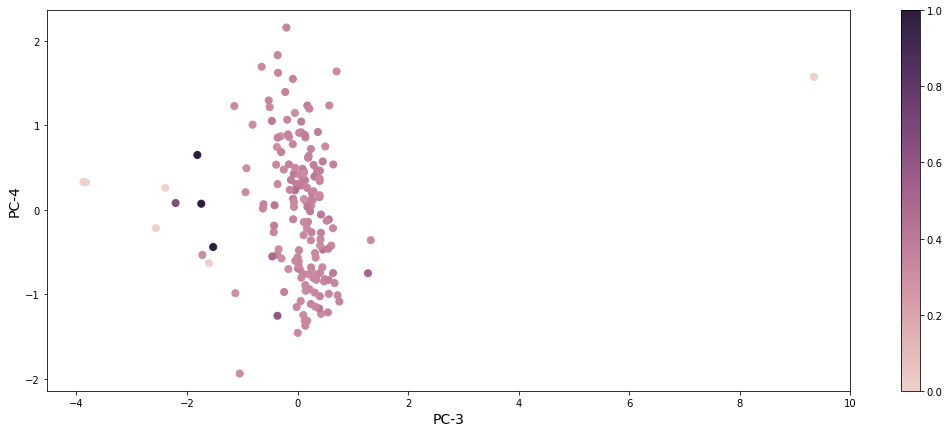

In [271]:
# Nuage de points des différents magasins en fonction des composantes principales (axes) et des ventes moyennes (couleur)

df_plot_pca = pd.DataFrame(X_pca)
df_plot_pca["Libellé thème_transformed_Libellé thème_JERSEY"] = data["Libellé thème_transformed_Libellé thème_JERSEY"]

cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(18,7))

## Choisir les Composantes principales en X et en Y
x_pc = 3
y_pc = 4
points = ax.scatter(x=df_plot_pca[x_pc], 
                    y=df_plot_pca[y_pc], 
                    c=df_plot_pca["Libellé thème_transformed_Libellé thème_JERSEY"], 
                    s=50, 
                    cmap=cmap)
plt.xlabel("PC-"+str(x_pc), fontsize=14)
plt.ylabel("PC-"+str(y_pc), fontsize=14)
f.colorbar(points);

# III. Clustering

# K-means

In [254]:
from sklearn.cluster import KMeans

## II.1. Méthode du coude pour définir le nombre de clusters

Il peut être intéressant de tester le clustering avec les données brutes, les données normalisées, et les données transformées avec l'ACP.

In [259]:
#Méthode du coude
data =  data.reset_index()
data_cluster = data.copy()
data_cluster = data_cluster.drop("Magasin", axis=1)

# Normalisation
cols_scale = list(data_cluster.columns)
scaler = StandardScaler()
data_cluster[cols_scale] = scaler.fit_transform(data_cluster[cols_scale])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


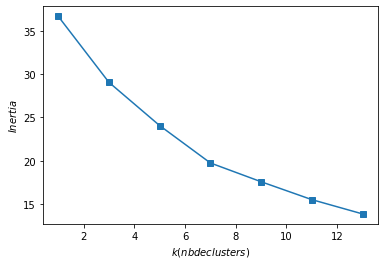

In [260]:
# Entrainer un k-means ici
inertia = []
for k in range(1, 15, 2):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_cluster)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 15, 2), inertia, marker='s');
plt.xlabel('$k (nb de clusters)$')
plt.ylabel('$Inertia$');

In [261]:
# Ajoutez les labels des clusters au dataframe

Nb_clusters = 6
kmeans = KMeans(n_clusters=Nb_clusters, random_state=1).fit(data_cluster)

# Ajout des Labels de cluster pour chaque store (ie à quel cluster appartient chaque store ?) au data set initial
data["Cluster"] = kmeans.labels_
data.head()

,Magasin,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall_transformed_Mall_OUI,Libellé thème_transformed_Libellé thème_JERSEY,Libellé thème_transformed_Libellé thème_MAILLE,Cluster
0,Magasin_1,512234,2283,224.368813,396.439363,0.000000,0,0.307927,0.201220,1
1,Magasin_10,181469,856,211.996495,266.656273,1.479903,0,0.328829,0.225225,1
2,Magasin_100,593470,2546,233.098979,325.514678,1.384380,1,0.314815,0.206790,0
3,Magasin_101,458868,2169,211.557400,239.881670,1.371019,0,0.338078,0.199288,1
4,Magasin_102,163359,793,206.001261,277.290152,1.555035,0,0.363636,0.203463,1


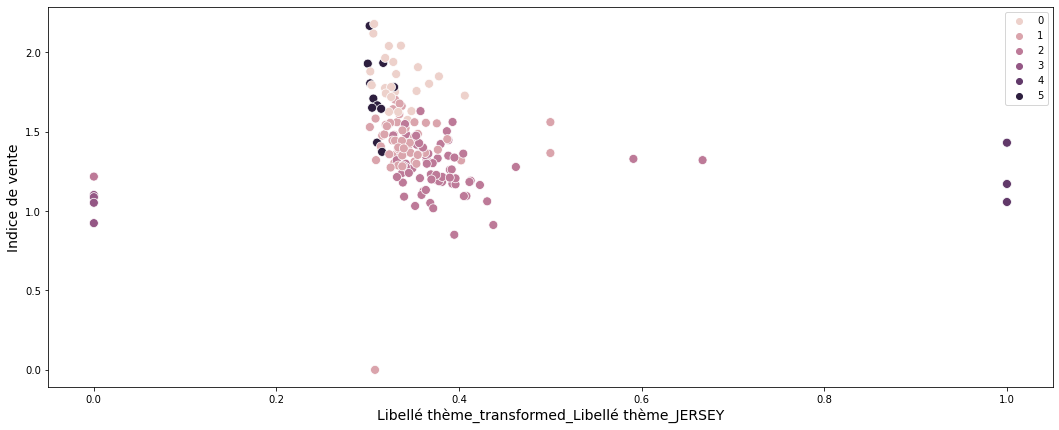

In [276]:
## Visualisation des clusters

# Changer les axes X et Y pour voir la répartition des clusters...
x_axis = "Libellé thème_transformed_Libellé thème_JERSEY"
y_axis = "Indice de vente"

plt.figure(figsize=(18,7))

sns.scatterplot(
    x = data[x_axis],
    y = data[y_axis],
    hue = data["Cluster"],
    s=80,
)

plt.xlabel(x_axis, fontsize=14)
plt.ylabel(y_axis, fontsize=14)
plt.legend()
plt.show()

### Caractéristisation des clusters :

Analysez chacun des clusters : Quelle est la distribution des variables ? Nous vous invitons à filtrer sur chacun des clusters et à établir des statistiques.

*Commencez avec des analyses statistiques simples*

Taille des clusters

In [263]:
data["Cluster"].value_counts()

2    68
1    57
0    24
5    11
3     5
4     3
Name: Cluster, dtype: int64

In [264]:
data.groupby("Cluster").mean()

,Montant total,Ventes17_19,Prix de vente moyen,Panier moyen  HT (Taux budget),Indice de vente,Mall_transformed_Mall_OUI,Libellé thème_transformed_Libellé thème_JERSEY,Libellé thème_transformed_Libellé thème_MAILLE
Cluster,,,,,,,,
0,367065.291667,1721.375000,210.999113,338.991065,1.809762,0.291667,0.333322,0.207357
1,299561.263158,1446.649123,206.898402,249.647465,1.423176,0.000000,0.343871,0.206468
2,182622.220588,925.970588,194.597082,219.955985,1.270507,0.985294,0.373824,0.207371
3,371.000000,1.200000,319.000000,196.012367,1.050035,1.000000,0.000000,0.000000
4,143.333333,1.333333,103.333333,240.190646,1.218794,1.000000,1.000000,0.000000
5,958926.363636,4391.272727,218.828194,325.774918,1.734194,0.363636,0.310190,0.211000


In [265]:
data.mean()

Montant total                                     290793.720238
Ventes17_19                                         1399.119048
Prix de vente moyen                                  204.773211
Panier moyen  HT (Taux budget)                      253.612238
Indice de vente                                        1.422217
Mall_transformed_Mall_OUI                              0.511905
Libellé thème_transformed_Libellé thème_JERSEY         0.353765
Libellé thème_transformed_Libellé thème_MAILLE         0.197425
Cluster                                                1.636905
dtype: float64

**Portez une attention particulière à l'analyse et l'interprétation des premiers résultats du clustering. Ces résultats pourront vous inspirer la création de nouvelles variables plus pertinentes, ou l'adoption d'une nouvelle démarche. Par exemple, si on trouve un cluster principal qui contient la majorité des magasins et d'autres clusters avec un très faible nombre de magasins, il peut être intéressant de les écarter et de refaire un clustering uniquement sur le gros cluster.**

**On tombe rarement sur la bonne réponse du premier coup, c'est une approche très itérative.**
